## 目录:
* 图计算
* 占位符
* 张量

In [2]:
import tensorflow as tf
tf.__version__

'1.4.0'

# 1. 图计算

TensorFlow 是一种采用数据流图（data flow graphs），用于数值计算的开源软件库。其中 Tensor 代表传递的数据为张量（多维数组），Flow 代表使用计算图进行运算。数据流图用「结点」（nodes）和「边」（edges）组成的有向图来描述数学运算。

在 Tensorflow 中，所有不同的变量和运算都是储存在计算图。所以在我们构建完模型所需要的图之后，还需要打开一个会话（Session）来运行整个计算图

In [3]:
#构建图
node1 = tf.constant(3.0,tf.float32)
node2 = tf.constant(4.0,tf.float32)
node3 = tf.add(node1,node2)
print(node1)
print(node2)
print(node3)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Add:0", shape=(), dtype=float32)


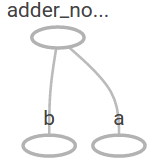

In [4]:
#计算图
sess = tf.Session()
sess.run([node1,node2,node3])

[3.0, 4.0, 7.0]

In [5]:
sess.run(node1)

3.0

TensorFlow 中最基本的单位是常量（Constant）、变量（Variable）和占位符（Placeholder）。常量定义后值和维度不可变，变量定义后值可变而维度不可变。

# 2. 占位符

占位符并没有初始值，它只会分配必要的内存。在会话中，占位符可以使用 feed_dict 馈送数据。
feed_dict 是一个字典，在字典中需要给出每一个用到的占位符的取值。在训练神经网络时需要每次提供一个批量的训练样本，如果每次迭代选取的数据要通过常量表示，那么 TensorFlow 的计算图会非常大。因为每增加一个常量，TensorFlow 都会在计算图中增加一个结点。所以说拥有几百万次迭代的神经网络会拥有极其庞大的计算图，而占位符却可以解决这一点，它只会拥有占位符这一个结点。

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b #tf.add(a,b)
print(adder_node)

In [ ]:
sess = tf.Session()
print(sess.run(adder_node,feed_dict = {a:3,b:4.5}))
print(sess.run(adder_node,feed_dict = {a:[1,3],b:[2,4]}))# matrix addition

# 3. 张量

在 TensorFlow 中，张量是计算图执行运算的基本载体，我们需要计算的数据都以张量的形式储存或声明。

In [ ]:
3 # a rank 0 tensor; a scalar with shape []

零阶张量是标量数字

In [ ]:
[1., 2., 3.] # a rank 1 tensor; a vector with shape [3]

一阶张量是一维向量

In [ ]:
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]

二阶张量是二维向量，也就矩阵

In [ ]:
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

三阶张量是三维数字